# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

from sklearn import preprocessing 
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
#data.head(5)

Data shape: (541909, 8)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [4]:
#Узнаем сколько уникальных клиентов совершали транзакции в указанный период
data['CustomerID'].nunique()

4372

In [5]:
#Узнаем из каких стран совершались транзакции
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
# Посмотрим есть ли пропуски
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Пропуски обнаружены в столбцах 'Description', 'CustomerID'

In [7]:
# Проверим датасет на дубликаты
data.duplicated().sum()

5268

In [8]:
# Переведем столбец 'InvoiceData' в формат datetime и узнаем границы
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [9]:
data = data.dropna(subset=['CustomerID'])

In [10]:
#Повторно проверим датасет на наличие пропусков
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [11]:
data = data.drop_duplicates(ignore_index=True)

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [12]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [15]:
data_quan = data.copy()

In [16]:
data_quan = data_quan.dropna(subset=['QuantityCanceled']) # Удаляем те транзакции - возврат, которые не имеют контрагентов

In [17]:
data_quan = data_quan[data_quan['Quantity'] > 0] #Оставляем только положительные значения


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [19]:
special_codes = data_quan[data_quan['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
print('Special code{}'.format(special_codes))
for special_code in special_codes:
    data_clean = data_quan[data_quan['StockCode'] != special_code]
data_clean.shape

Special code['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']


(392716, 9)

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [20]:
data_cleaner = data_clean[data_clean['UnitPrice'] != 0] #Оставляем только не нулевые значения
data_cleaner.shape

(392676, 9)

#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [21]:
data_cleaner['TotalPrice'] = data_clean['UnitPrice']*(data_clean['Quantity']-data_clean['QuantityCanceled'])

In [22]:
#Выделяем в отдельные столбцы: месяц, день, час и дату
data_cleaner['InvoiceMonth'] = data_cleaner['InvoiceDate'].dt.month
data_cleaner['InvoiceWeekday'] = data_cleaner['InvoiceDate'].dt.day_name()
data_cleaner['InvoiceHour'] = data_cleaner['InvoiceDate'].dt.hour
data_cleaner['Date'] = data_cleaner['InvoiceDate'].dt.date

In [23]:
data_new = data_cleaner.copy()

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



Клиенты из каких стран покупают больше и чаще?

In [24]:
count_invoice_per_country = data_new.groupby(by=['Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
fig = px.bar(
    count_invoice_per_country, 
    x = 'Country',
    y = 'InvoiceNo',
    color = 'Country',
    title='Number of orders per country',
    height=500
    )
fig.show()

In [25]:
revenue_per_country = data_new.groupby(by=['Country'], as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
fig = px.bar(
    revenue_per_country, 
    x = 'Country',
    y = 'TotalPrice',
    color = 'Country',
    title='Total revenue per country',
    height=500
    )
fig.show()

Больше и чаще заказывают клиенты из United Kingdom (Великобритания)

Какие страны приносят наибольшую сезонную выручку?

In [27]:
revenue_per_country_and_month = data_new.groupby(by=['InvoiceMonth','Country'], as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
fig = px.bar(
    revenue_per_country_and_month, 
    x = 'InvoiceMonth',
    y = 'TotalPrice',
    color = 'Country',
    ## color = 'InvoiceMonth'
    title='Total revenue per country',
    height=500
    )
fig.show()

В каждом месяце - это Великобритания

Присутствует ли в продажах сезонность (когда покупают чаще)?

In [28]:
revenue_per_month = data_new.groupby(by=['InvoiceMonth'], as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
fig = px.bar(
    revenue_per_month, 
    x = 'InvoiceMonth',
    y = 'TotalPrice',
    color = 'InvoiceMonth',
    title='Total revenue per month'
    )
fig.show()

Наибольшая суммарная выручка в ноябре

найдите количество заказов на каждый день-час

In [29]:
count_invoice_per_date_hour = data_new.groupby(by=['Date', 'InvoiceHour'], as_index=False)['InvoiceNo'].count()
mean_count_invoice_per_hour = count_invoice_per_date_hour.groupby(by='InvoiceHour', as_index=False).mean()
fig = px.bar(
    mean_count_invoice_per_hour, 
    x = 'InvoiceHour',
    y = 'InvoiceNo',
    color = 'InvoiceHour',
    title='Number of orders per hour'
    )
fig.show()

Больше всего закозов совершается с 10 до 15 часов

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [30]:
now = pd.to_datetime('2011-12-10')
custom_aggregation = {
    'InvoiceDate' : lambda x: (now - x.max()).days,
    'InvoiceNo' : lambda x: len(x.unique()),
    'TotalPrice' : lambda x: x.sum(),
}
rfm_table = data_new.groupby('CustomerID').agg(custom_aggregation)
rfm_table = rfm_table.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'})
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [31]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [32]:
h_cap_monetary = rfm_table['Monetary'].quantile(0.95)
h_cap_frequency = rfm_table['Frequency'].quantile(0.95)
outliers = rfm_table[
    (rfm_table['Monetary']>h_cap_monetary) |
    (rfm_table['Frequency']>h_cap_frequency)
]
rfm_table_cleaned = rfm_table.drop(outliers.index)
print(rfm_table_cleaned.shape)

(4048, 3)


In [33]:
boxes = [px.box(rfm_table_cleaned, x=column) for column in rfm_table_cleaned.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [35]:
pipepline_preprocessing = pipeline.Pipeline(
    steps = [
        ('scaler', preprocessing.StandardScaler()), 
        ('dimension', decomposition.PCA(n_components = 2))
        ]
)
rfm_table_processed = pipepline_preprocessing.fit_transform(rfm_table_cleaned)
rfm_table_processed = pd.DataFrame(rfm_table_processed, columns = ['axis-1', 'axis-2'], index = rfm_table_cleaned.index)
print(round(pipepline_preprocessing['dimension'].explained_variance_ratio_[0], 2))

0.68


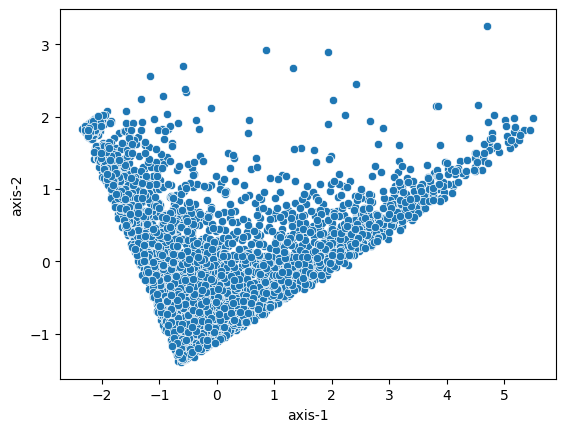

In [36]:
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2');

# Иерарическая кластеризация

In [38]:
n_clusters_list = list(range(2, 11))
silhouette_score = []
for n_clusters in n_clusters_list:
    agglomerative = cluster.AgglomerativeClustering(n_clusters = n_clusters)
    agglomerative.fit(rfm_table_processed)
    clusters = agglomerative.labels_
    silhouette_avg = metrics.silhouette_score(rfm_table_processed, clusters)
    silhouette_score.append(silhouette_avg)
silhoutte_df = pd.DataFrame({'n_clusters':n_clusters_list, 'silhouette_score':silhouette_score})
px.line(
    silhoutte_df,
    x = 'n_clusters',
    y = 'silhouette_score'
)


По итогам иерархической кластеризации пик коэффициента силуэта приходится на 3, значит оптимальным количеством классов будет 3

# K-means

In [39]:
n_clusters_list = list(range(2, 11))
silhouette_score = []
for n_clusters in n_clusters_list:
    kmeans = cluster.KMeans(init='k-means++', n_clusters = n_clusters, random_state = 42)
    kmeans.fit(rfm_table_processed)
    clusters = kmeans.predict(rfm_table_processed)
    silhouette_avg = metrics.silhouette_score(rfm_table_processed, clusters)
    silhouette_score.append(silhouette_avg)
silhoutte_df = pd.DataFrame({'n_clusters':n_clusters_list, 'silhouette_score':silhouette_score})
px.line(
    silhoutte_df,
    x = 'n_clusters',
    y = 'silhouette_score'
)

По итогам K-means пик коэффициента силуэта приходится на 3, значит оптимальным количеством классов будет 3

# EM-алгоритм

In [40]:
n_clusters_list = list(range(2, 10))
silhouette_score = []
for n_clusters in n_clusters_list:
    em = mixture.GaussianMixture(n_components = n_clusters, random_state = 42)
    em.fit(rfm_table_processed)
    clusters = em.predict(rfm_table_processed)
    silhouete_avg = metrics.silhouette_score(rfm_table_processed, clusters)
    silhouette_score.append(silhouete_avg)
silhouette_df = pd.DataFrame({'n_clusters':n_clusters_list, 'silhouette_score':silhouette_score})
px.line(
    silhoutte_df,
    x = 'n_clusters',
    y = 'silhouette_score'
)

По итогам EM-алгоритма пик коэффициента силуэта приходится на 3, значит оптимальным количеством классов будет 3

# Спектральная кластеризация

In [41]:
n_clusters_list = list(range(2, 10))
silhouette_score = []
for n_clusters in n_clusters_list:
    spectr = SpectralClustering(n_clusters = n_clusters, random_state = 42)
    spectr.fit(rfm_table_processed)
    clusters = spectr.labels_
    silhouete_avg = metrics.silhouette_score(rfm_table_processed, clusters)
    silhouette_score.append(silhouete_avg)
silhouette_df = pd.DataFrame({'n_clusters':n_clusters_list, 'silhouette_score':silhouette_score})
px.line(
    silhoutte_df,
    x = 'n_clusters',
    y = 'silhouette_score'
)

По итогам спектральной кластеризации пик коэффициента силуэта приходится на 3, значит оптимальным количеством классов будет 3

# DBSCAN

<AxesSubplot: xlabel='axis-1', ylabel='axis-2'>

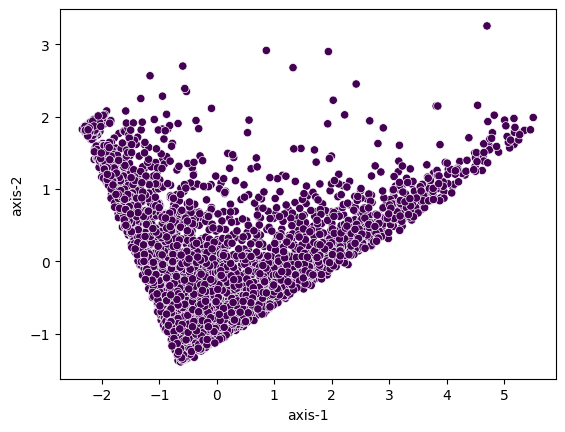

In [42]:
clustering = DBSCAN(eps=5, min_samples=5).fit(rfm_table_processed)
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2', c=clustering.labels_)

Как и ожидалось DBSCAN определил, что плотность точек примерно равномерна на всей площади распределения и отнес все точки к единому кластеру. Это связано с тем, что приведённые данные образуют один участок с одинаковой плотностью, из-за чего DBSCAN не может разделить такие данные на кластеры;


Итого: за исключением метода DBSCAN, все методы рекомендуют взять за оптимальное количество классов - 3
Коэффициенты силуэта EM-алгоритма, K-means, спектральной кластеризации одинаковы и равны 0.525. Для визуализации возьмем спектральную клсастеризацию с 3 кластерами

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

Спектральная кластеризация

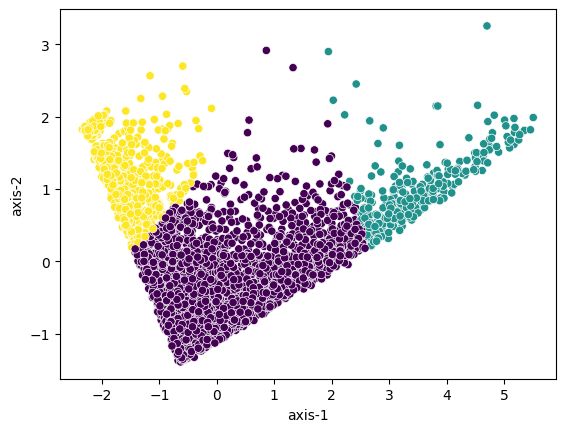

In [56]:
spectr = SpectralClustering(n_clusters=3, random_state=42)
spectr.fit(rfm_table_processed)
spectral_predictions = spectr.labels_
sns.scatterplot(data=rfm_table_processed, x='axis-1', y='axis-2',c=spectral_predictions);


#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

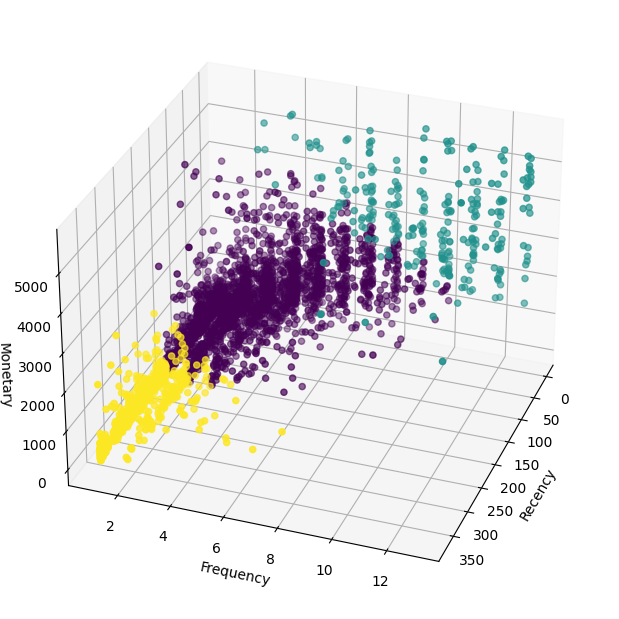

In [67]:
#создадим трехмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
#добавим дополнительные оси в объект картинки
fig.add_axes(ax)
ax.azim = 20
ax.elev = 30

#визуализируем данные, передав занчения x, y, z, а также информацию группировки данных по цветам
ax.scatter(
    rfm_table_cleaned['Recency'].to_list(),
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list(),
    c = spectral_predictions
)

#добавим ось
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

Желтый кластер: Recency 150-400, Frequency 1-7, Monetary 0-3000. Спящие. Третий по размеру кластер

Фиолетовый кластер: Recency 0-200, Frequency 1-10, Monetary 0-5000. В зоне риска. Самый большой кластер

Голубой кластер: Recency 0-50, Frequency 3-13, Monetary 1500-7000. Лояльные. Второй по размеру кластер

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [51]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [58]:
cluster_grouped = rfm_table_cleaned.groupby(spectral_predictions).mean()


In [60]:
plot_cluster_profile(cluster_grouped, n_clusters = 3)

Cluster 1 - Frequency = 1, Monetary = 1, Recency = 0. Покупают часто, на большую сумму, недавно. (Лояльные)
Cluster 0 - Frequency = 0.2, Monetary = 0.17, Recency = 0.13. Покупали недавно, но на маленькую сумму, с небольшой частотой. (В зоне риска)
Cluster 2 - Frequency = 0, Monetary = 0, Recency = 1. Покупка была совершена очень давно. (Спящие)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

В данной работе проводилась сегментация клиентов онлайн магазина подарков. Для этого данные очищались от дубликатов и пропусков, а также приводились в нужные форматы, были созданы новые признаки. Был проведен разведывательный анализ, что дало нам более подробное представление о клиентах и их покупках. Данные были преобразованы в RFM-характеристики. С помощью метода понижения размерности РСА и моделей кластеризации (иерархическая, K-means, EM-алгоритм, спектральная) было определено оптимальное количество кластеров. Данные были разделены на з кластера, и с помощью построения графиков и полярных диаграмм клиенты магазина были определены как: лояльные, в зоне риска, спящие.